In [8]:
import contextily as ctx
import findspark

In [2]:
findspark.init("/home/danial/spark-3.4.0-bin-hadoop3")

In [3]:
from pyspark.sql import SparkSession

In [27]:
# To startup the SparkSession with JDBC driver 

spark = SparkSession.builder.config('spark.jars.packages', 'org.xerial:sqlite-jdbc:3.42.0.0').getOrCreate()

In [28]:
df_spark = spark.read.format('jdbc').options(driver='org.sqlite.JDBC', \
                                             inferSchema = True,\
                                             header = True,\
                                             dbtable = 'fires',\
                                             url= 'jdbc:sqlite:/home/danial/Desktop/mygis/data_from_internet/1.kaggle/1.88_M_US_fires/FPA_FOD_20170508.sqlite').load()


In [30]:
df_spark.select('OBJECTID').show()

+--------+
|OBJECTID|
+--------+
|       1|
|       2|
|       3|
|       4|
|       5|
|       6|
|       7|
|       8|
|       9|
|      10|
|      11|
|      12|
|      13|
|      14|
|      15|
|      16|
|      17|
|      18|
|      19|
|      20|
+--------+
only showing top 20 rows



In [6]:
df_spark.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- FOD_ID: decimal(38,18) (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DATE: decimal(38,18) (null

23/06/05 14:48:55 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


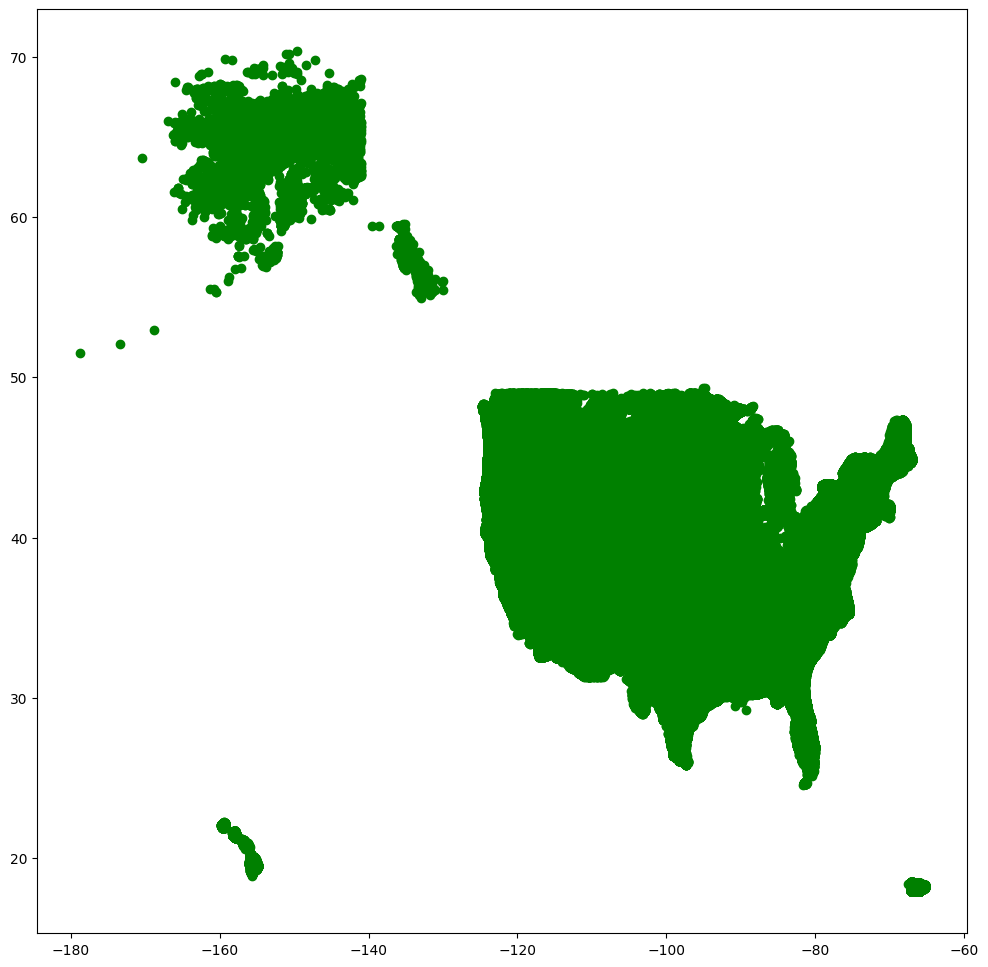

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert Spark DataFrame to a temporary view
df_spark.createOrReplaceTempView("data")

# Extract latitude and longitude columns from the Spark DataFrame
latitude = df_spark.select("LATITUDE").rdd.flatMap(lambda x: x).collect()
longitude = df_spark.select("LONGITUDE").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(longitude, latitude, c='green')

# Add a basemap if needed
ctx.add_basemap(ax, crs=greenways_buffer.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


# Set the plot limits
# ...

# Show the plot
plt.show()


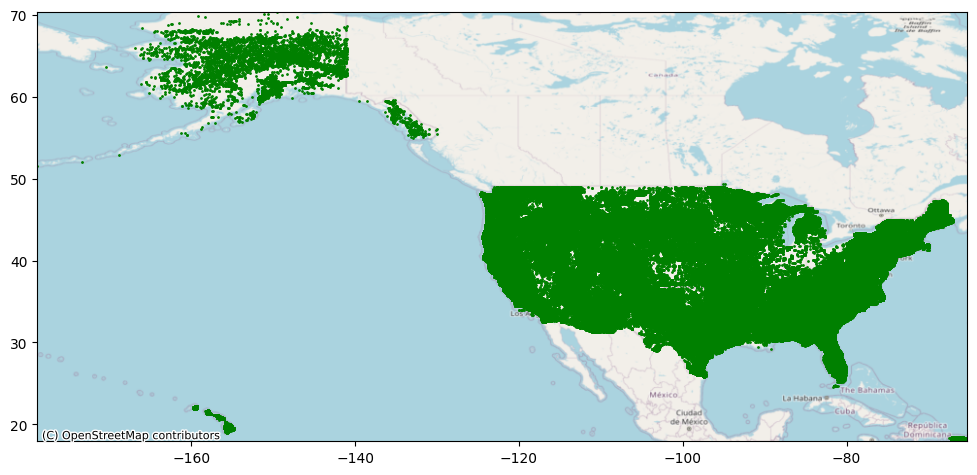

In [20]:

# Select the latitude and longitude columns
latitude = df_spark.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
longitude = df_spark.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(min(longitude), max(longitude))
ax.set_ylim(min(latitude), max(latitude))

# Add the basemap using contextily
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the scatter points
ax.scatter(longitude, latitude, c='green', s=1)

# Show the plot
plt.show()

# Close the SparkSession
spark.stop()


In [24]:
df_spark.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- FOD_ID: decimal(38,18) (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DATE: decimal(38,18) (null

In [41]:
df_spark.select('COUNTY','STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS').show()

+------+-----+----------------+--------------------+--------------+--------------------+---------------+
|COUNTY|STATE|STAT_CAUSE_DESCR|      DISCOVERY_DATE|DISCOVERY_TIME|           FIRE_SIZE|FIRE_SIZE_CLASS|
+------+-----+----------------+--------------------+--------------+--------------------+---------------+
|    63|   CA|   Miscellaneous|2453403.500000000...|          1300|0.100000000000000000|              A|
|    61|   CA|       Lightning|2453137.500000000...|          0845|0.250000000000000000|              A|
|    17|   CA|  Debris Burning|2453156.500000000...|          1921|0.100000000000000000|              A|
|     3|   CA|       Lightning|2453184.500000000...|          1600|0.100000000000000000|              A|
|     3|   CA|       Lightning|2453184.500000000...|          1600|0.100000000000000000|              A|
|     5|   CA|       Lightning|2453186.500000000...|          1800|0.100000000000000000|              A|
|    17|   CA|       Lightning|2453187.500000000...|   

In [52]:
df_spark.select('COUNTY','STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS').describe().show()

+-------+-----------------+-------+----------------+--------------------+------------------+--------------------+---------------+
|summary|           COUNTY|  STATE|STAT_CAUSE_DESCR|      DISCOVERY_DATE|    DISCOVERY_TIME|           FIRE_SIZE|FIRE_SIZE_CLASS|
+-------+-----------------+-------+----------------+--------------------+------------------+--------------------+---------------+
|  count|          1202317|1880465|         1880465|             1880465|            997827|             1880465|        1880465|
|   mean|43.72427478281645|   null|            null|2453063.657027118...|1453.0143261306819|74.52015833992390...|           null|
| stddev|41.92782842806354|   null|            null|   2434.573159185869| 405.9609625656342|   2497.598179796961|           null|
|    min|              001|     AK|           Arson|2448622.500000000...|              0000|0.000010000000000000|              A|
|    max|          yankton|     WY|       Structure|2457387.500000000...|              235

In [57]:
uniques_fire_size_class = df_spark.select('FIRE_SIZE_CLASS').distinct().collect()

for row in uniques_fire_size_class:
    print (row[0])

F
E
B
D
C
A
G


In [68]:
df_spark.groupBy('FIRE_SIZE_CLASS').count().show()

+---------------+------+
|FIRE_SIZE_CLASS| count|
+---------------+------+
|              F|  7786|
|              E| 14107|
|              B|939376|
|              D| 28427|
|              C|220077|
|              A|666919|
|              G|  3773|
+---------------+------+



In [69]:
from pyspark.sql import functions as F

df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).show()


+---------------+--------------------+
|FIRE_SIZE_CLASS|      avg(FIRE_SIZE)|
+---------------+--------------------+
|              F|2130.395128422810...|
|              E|512.8549039420146...|
|              B|2.146998274939960...|
|              D|161.8010338723748...|
|              C|28.53191445355943...|
|              A|0.118801012820147...|
|              G|27388.19070278293...|
+---------------+--------------------+



In [77]:
df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).dtypes

[('FIRE_SIZE_CLASS', 'string'), ('avg(FIRE_SIZE)', 'decimal(38,22)')]

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Perform the groupBy and aggregation
result_df = df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).toPandas()
result_df_ordered = result_df.sort_values(by='FIRE_SIZE_CLASS')
result_df_ordered

,FIRE_SIZE_CLASS,avg(FIRE_SIZE)
5,A,0.1188010128201475741432
2,B,2.1469982749399601437680
4,C,28.5319144535594360158399
3,D,161.8010338723748548921800
1,E,512.8549039420146026795208
0,F,2130.3951284228101721037760
6,G,27388.1907027829313543599258


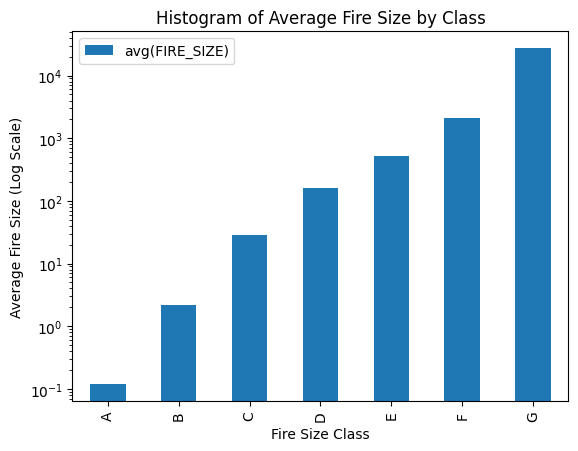

In [87]:

import matplotlib.pyplot as plt

# Convert the average fire size column to a numeric data type
result_df_ordered['avg(FIRE_SIZE)'] = result_df_ordered['avg(FIRE_SIZE)'].astype(float)

# Plot the histogram with log scale on y-axis
result_df_ordered.plot(x='FIRE_SIZE_CLASS', y='avg(FIRE_SIZE)', kind='bar')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Fire Size Class')
plt.ylabel('Average Fire Size (Log Scale)')
plt.title('Histogram of Average Fire Size by Class')
plt.show()



In [72]:
result_df

,FIRE_SIZE_CLASS,avg(FIRE_SIZE)
0,Letter F,2130.3951284228101721037760
1,Letter E,512.8549039420146026795208
2,Letter B,2.1469982749399601437680
3,Letter D,161.8010338723748548921800
4,Letter C,28.5319144535594360158399
5,Letter A,0.1188010128201475741432
6,Letter G,27388.1907027829313543599258


In [98]:
df_spark.groupBy('STATE').count().show(truncate=False)


+-----+------+
|STATE|count |
+-----+------+
|AZ   |71586 |
|SC   |81315 |
|LA   |30013 |
|MN   |44769 |
|NJ   |25949 |
|DC   |66    |
|OR   |61088 |
|VA   |21833 |
|RI   |480   |
|WY   |14166 |
|KY   |27089 |
|NH   |2452  |
|MI   |10502 |
|NV   |16956 |
|WI   |31861 |
|ID   |36698 |
|CA   |189550|
|NE   |7973  |
|CT   |4976  |
|MT   |40767 |
+-----+------+
only showing top 20 rows



In [100]:
df_spark.select('STATE').distinct().count()

52

In [102]:
df_spark.select('STAT_CAUSE_DESCR').distinct().show()

+-----------------+
| STAT_CAUSE_DESCR|
+-----------------+
|    Miscellaneous|
|          Smoking|
|        Lightning|
|         Campfire|
|            Arson|
|   Debris Burning|
|         Railroad|
|        Powerline|
|Missing/Undefined|
|        Structure|
|         Children|
|        Fireworks|
|    Equipment Use|
+-----------------+



In [104]:
df_spark.groupBy('STAT_CAUSE_DESCR').count().show()

+-----------------+------+
| STAT_CAUSE_DESCR| count|
+-----------------+------+
|    Miscellaneous|323805|
|          Smoking| 52869|
|        Lightning|278468|
|         Campfire| 76139|
|            Arson|281455|
|   Debris Burning|429028|
|         Railroad| 33455|
|        Powerline| 14448|
|Missing/Undefined|166723|
|        Structure|  3796|
|         Children| 61167|
|        Fireworks| 11500|
|    Equipment Use|147612|
+-----------------+------+



In [116]:

# Compute the total count of all rows
total_count = df_spark.count()

# Perform the groupBy and aggregation
result_df = df_spark.groupBy('STAT_CAUSE_DESCR').count()
#result_df.show()
# Calculate the percentage
result_df = result_df.withColumn('percentage', (col('count') / total_count) * 100)

# Show the result
result_df.show()


+-----------------+------+-------------------+
| STAT_CAUSE_DESCR| count|         percentage|
+-----------------+------+-------------------+
|    Miscellaneous|323805| 17.219411156283154|
|          Smoking| 52869|  2.811485457054505|
|        Lightning|278468| 14.808464927557813|
|         Campfire| 76139|  4.048945340647127|
|            Arson|281455| 14.967308617815275|
|   Debris Burning|429028| 22.814995227244324|
|         Railroad| 33455|   1.77908123788531|
|        Powerline| 14448| 0.7683206015533393|
|Missing/Undefined|166723|  8.866051747838966|
|        Structure|  3796|0.20186496425086348|
|         Children| 61167|  3.252759290920065|
|        Fireworks| 11500| 0.6115508664080427|
|    Equipment Use|147612|  7.849760564541216|
+-----------------+------+-------------------+



In [119]:

result_df_ordered = result_df.toPandas().sort_values(by='percentage')
result_df_ordered

,STAT_CAUSE_DESCR,count,percentage
9,Structure,3796,0.201865
11,Fireworks,11500,0.611551
7,Powerline,14448,0.768321
6,Railroad,33455,1.779081
1,Smoking,52869,2.811485
10,Children,61167,3.252759
3,Campfire,76139,4.048945
12,Equipment Use,147612,7.849761
8,Missing/Undefined,166723,8.866052
2,Lightning,278468,14.808465


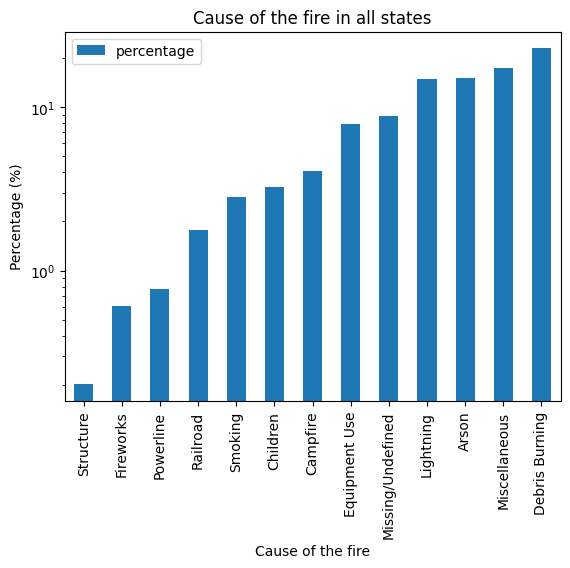

In [123]:

import matplotlib.pyplot as plt


# Plot the histogram with log scale on y-axis
result_df_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the fire in all states')
plt.show()

In [124]:
df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().show()

+-----+-----------------+-----+
|STATE| STAT_CAUSE_DESCR|count|
+-----+-----------------+-----+
|   VA|   Debris Burning| 7215|
|   GA|Missing/Undefined|   10|
|   DE|        Fireworks|    1|
|   GA|        Structure|    2|
|   PA|        Structure|    5|
|   WV|        Lightning|  265|
|   CT|    Miscellaneous| 2714|
|   PR|Missing/Undefined|21821|
|   ID|         Campfire| 1986|
|   IN|    Equipment Use|   98|
|   WY|            Arson|  265|
|   ND|          Smoking|   90|
|   MD|   Debris Burning|  837|
|   VT|         Children|    5|
|   MT|          Smoking|  885|
|   CO|         Children|  208|
|   LA|        Fireworks|   80|
|   AZ|        Lightning|28776|
|   PA|         Campfire|  498|
|   AK|            Arson|  458|
+-----+-----------------+-----+
only showing top 20 rows



In [138]:
ca = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'CA')
ca.show()

+-----+-----------------+-----+
|STATE| STAT_CAUSE_DESCR|count|
+-----+-----------------+-----+
|   CA|        Fireworks|  219|
|   CA|    Miscellaneous|51943|
|   CA|   Debris Burning|14318|
|   CA|        Powerline| 1198|
|   CA|        Structure|  123|
|   CA|    Equipment Use|39407|
|   CA|         Campfire| 9516|
|   CA|            Arson|19635|
|   CA|Missing/Undefined|12605|
|   CA|        Lightning|27000|
|   CA|          Smoking| 5936|
|   CA|         Children| 6930|
|   CA|         Railroad|  720|
+-----+-----------------+-----+



In [139]:
type(ca)

pyspark.sql.dataframe.DataFrame

In [143]:
ca_ordered = ca.toPandas().sort_values(by='count')
ca_ordered

,STATE,STAT_CAUSE_DESCR,count
4,CA,Structure,123
0,CA,Fireworks,219
12,CA,Railroad,720
3,CA,Powerline,1198
10,CA,Smoking,5936
11,CA,Children,6930
6,CA,Campfire,9516
8,CA,Missing/Undefined,12605
2,CA,Debris Burning,14318
7,CA,Arson,19635


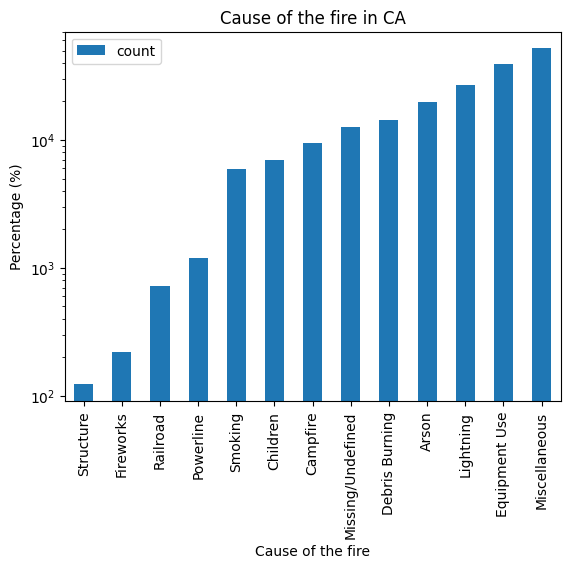

In [146]:

import matplotlib.pyplot as plt


# Plot the histogram with log scale on y-axis
ca_ordered.plot(x='STAT_CAUSE_DESCR', y='count', kind='bar')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the fire in CA')
plt.show()

In [155]:
df_spark.select('STATE').distinct().show()

+-----+
|STATE|
+-----+
|   AZ|
|   SC|
|   LA|
|   MN|
|   NJ|
|   DC|
|   OR|
|   VA|
|   RI|
|   WY|
|   KY|
|   NH|
|   MI|
|   NV|
|   WI|
|   ID|
|   CA|
|   NE|
|   CT|
|   MT|
+-----+
only showing top 20 rows



In [156]:
df_spark.groupBy('STATE').count().show()

+-----+------+
|STATE| count|
+-----+------+
|   AZ| 71586|
|   SC| 81315|
|   LA| 30013|
|   MN| 44769|
|   NJ| 25949|
|   DC|    66|
|   OR| 61088|
|   VA| 21833|
|   RI|   480|
|   WY| 14166|
|   KY| 27089|
|   NH|  2452|
|   MI| 10502|
|   NV| 16956|
|   WI| 31861|
|   ID| 36698|
|   CA|189550|
|   NE|  7973|
|   CT|  4976|
|   MT| 40767|
+-----+------+
only showing top 20 rows



In [157]:

result_df = df_spark.groupBy('STATE').agg(F.avg('FIRE_SIZE')).toPandas()
result_df_ordered = result_df.sort_values(by='avg(FIRE_SIZE)', ascending=False)
result_df_ordered

,STATE,avg(FIRE_SIZE)
46,AK,2509.7791981779957953749124
13,NV,531.7206499174333569238028
15,ID,372.8904823423619815793776
34,NM,170.2343177600192112706121
9,WY,169.5235552873076380064944
19,MT,154.0345406868300340962053
27,WA,142.6974102587055769402918
6,OR,137.7161041448402304871661
50,UT,133.9276276325467860048820
17,NE,121.3343481625486015301643


In [170]:

result_df = df_spark.groupBy('STATE', 'FIRE_SIZE_CLASS').count().toPandas()
result_df[result_df['STATE'] == 'CA'].sort_values(by='count', ascending=False)


,STATE,FIRE_SIZE_CLASS,count
139,CA,A,98309
256,CA,B,76942
319,CA,C,9825
8,CA,D,2137
68,CA,E,1187
157,CA,F,756
239,CA,G,394


In [174]:
df_spark.select('COUNTY').distinct().show(n=1000)

+--------------------+
|              COUNTY|
+--------------------+
|           Petroleum|
|                Utah|
|      East Feliciana|
|           Worcester|
|              Aitkin|
|               Bucks|
|              Grimes|
|               Tyler|
|             Hanover|
|            Thurston|
|             HANCOCK|
|          CUMBERLAND|
|             JOHNSON|
|             lATIMER|
|               ADAIR|
|               OSAGE|
|Chattooga           |
|            OKANOGAN|
|       Unicoi County|
|                 125|
|          Deer Lodge|
|             Gilliam|
|               Izard|
|               Pasco|
|            Montcalm|
|          Charleston|
|            Angelina|
|           Oktibbeha|
|             Shannon|
|            REYNOLDS|
|               EMMET|
|            Island C|
|               ATOKA|
|Randolph            |
|              YAKIMA|
|LUCE             ...|
|            PONTOTOC|
|     Woodward County|
|              Hawaii|
|               Ferry|
|          

In [ ]:
ideas to consider for ML

1. Given state, county, cause of fire, date, can I predict the fire size class? (the problem is classification)
2. Given state, county, cause of fire, date, can I predict the fire size ? (the problem is regression)
3. Given time, location, and size can I predict the cause of the fire? is it a function of seasons? 

